Assignment Ten
Due Saturday May 4th

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
%matplotlib inline

Problem 1: (10 pts) In many cases, getting convergence rates via pen and paper is tricky. However, we can often readily find them via numerical simulation.

a.) (4 pts) For $$
f(x) = x\cos(x) - \sin^{2}(x), 
$$ find all the roots on the interval $[0,5]$ using Newton's method with a tolerance of $10^{-6}$.


In [2]:
f = lambda x: x*np.cos(x)-np.sin(x)**2
fp = lambda x: 3.*x**2. + 6.*x - 2.

def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        
    ##print "A root of f(x) is: %1.15f" %x1
    return x1

In [3]:
Newtons_method(f,fp,0.,1e-7)

0.0

In [4]:
Newtons_method(f,fp,5.,1e-7)

4.909534391393069

In [11]:
##xvals = np.linspace(0.,5.,50)
temp = []
for i in xrange(0,6):
    xval = Newtons_method(f,fp,i,1e-7)
    if xval <=5 and xval >=0:
        temp.append(xval)
print temp

[0.0, 4.909534391393053, 4.909534391393053, 4.909534391393053, 4.909534391393053, 4.909534391393069]


b.) (6 pts) For each root, establish that the rate of convergence is quadratic. Note, to do this, you will need to save the various points generated by Newton's method in an array. You will need to find the fixed point. Then, you should note that if $$
\lim_{n\rightarrow \infty}\frac{|x_{n+1}-x_{\ast}|}{|x_{n}-x_{\ast}|^{\alpha}} = \lambda, 
$$
then for $n$ large $$
\ln |x_{n+1}-x_{\ast}| \sim \alpha \ln |x_{n}-x_{\ast}| + \ln \lambda
$$ So, then you should be thinking about the slope of a line in a log/log plot.

Please provide a well-labeled and well-explained figure describing the rate of convergence for each fixed point. Does your rate change based on your initial guess? Again, please elaborate and show plots to make your case.

In [16]:
f = lambda x: x*np.cos(x)-np.sin(x)**2
fp = lambda x: 3.*x**2. + 6.*x - 2.

def Mod_Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    capproxs = np.array([x1])
    
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        capproxs = np.append(capproxs,x1)
    ##print "A root of f(x) is: %1.15f" %x1
    return capproxs

In [17]:
def convergence_plotter(cvals):
    clen = cvals.size
    cstr = cvals[clen-1]
    xvals = np.ma.log10(np.abs(cvals[:clen-3] - cstr))
    yvals = np.ma.log10(np.abs(cvals[1:clen-2] - cstr))
    ylen = yvals.size
    plt.plot(xvals,yvals,'*')
    slopes = (yvals[1:]-yvals[:ylen-1])/(xvals[1:]-xvals[:ylen-1])
    print 'The computed value of the maximum slope is %.15f'%np.max(slopes)
    print 'The computed value of the minimum slope is %.15f'%np.min(slopes)
    print 'The average value of the computed slope is %.15f'%np.mean(slopes)

The computed value of the maximum slope is 1.709511291351454
The computed value of the minimum slope is 0.545059794501117
The average value of the computed slope is 1.006015779151807



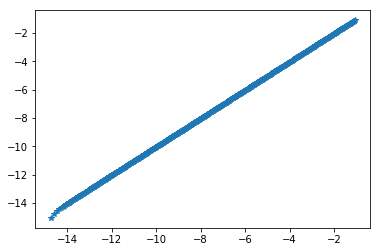

In [30]:
xval = Mod_Newtons_method(f,fp,5,1e-7)
convergence_plotter(xval)
print


Problem 2 : (10 pts) Using Newton's method, explain why the sequence $$
x_{n} = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}, ~ n\geq1, ~ x_{0}\gt;0,  
$$ converges to $\sqrt{A}$ (4 pts). Hint, you need to think of a function whose root is $\sqrt{A}$. Implement the method and characterize for various values of $x_{0}$ how quickly the method converges. (6 pts)

$$x_{1} = a \\
x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{x})}\\
for all n >= 1\\
function : f(x)=x^{2}-A\\
f'(x) = 2x\\
(plugin)\\
x_{n} = x_{n-1} - \frac{x_{n-1}^{2} -A}{2x_{n-1}}\\
=\frac{2xn_{n-1}^{2}-x_{n-1}^{2}+A}{2x_{n-1}}\\
Thus:x_{n} = \frac{x_{n-1}^{2}+A}{2x_{n-1}}\\
Then: x_{n}^{2} - A = (\frac{x_{n-1}^{2}+A}{2x_{n-1}})^{2}-A\\
= \frac{(x_{n-1}^{2}+A)^{2}}{4x_{n-1}^{2}}(>0)\\
x_{n}^{2} -A > 0\\
x_{n}^{2} > A\\
x_{n}>\sqrt{A}
$$

hence xn is convergent and has the limit point square root of A  